# STA 208: Homework 1
This is based on the material in Chapters 2, 3 of 'Elements of Statistical Learning' (ESL), in addition to lectures 1-4.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

# 1. Conceptual Exercises

__Exercise 1.1.__ (5 pts) Recall that the Hamming loss for Binary classification ($y \in \{0,1\}$) is 
$$l(y,\hat y) = 1\{y \ne \hat y\} = (y - \hat y)^2$$
as long as $\hat y \in \{0,1\}$.
This loss can be extended to multiclass classification where there are $K$ possible values that $y$ can take (for example 'dog','cat','squirrel' or 1-5 stars).  Explain how you can re-encode $y$ and $\hat y$ to be a $K-1$ dimensional vector that generalizes binary classification, and rewrite the loss using vector operations.

__Solution__:
Let $y = (v_1,...,v_{k})^T$, where $v_i = \{1$ if y = value i; 0 else $\}$, for $i = 1,...,k$.  
Thus, $$l(y,\hat y) = (v_1 - \hat v_1,...,v_{k} - \hat v_{k})(v_1 - \hat v_1,...,v_{k} - \hat v_{k})^T$$  
This gives the desired generalization and loss function.


__Exercise 1.2__ (5 pts) Ex. 2.7 in ESL

__Solution__:  
__(a)__ In linear regression, $\hat f(X_0) = X_0\hat\beta = X_0(X^TX)^{-1}X^TY$  
Since $X_0(X^TX)^{-1}X^T$ doesn't depend on y, we have $l(X_0;X)=X_0(X^TX)^{-1}X^T$.  So after matrix multiplication, we can see that $\hat f(X_0)$ is of the desired form.  
In kNN regression, $\hat f(X_0) = \frac{1}{k} \sum_{i=1}^k y_i$, which is the average of the k-nearest neighbors of $X_0$.  So we can rewrite as $\sum_{i=1}^N \frac{1}{k}I_{\{x_i \in N(x_0)\}}y_i$, where $N(X_0)$ is the neighborhood of k-nearest neighbors of $X_0$, and the $y_i$ corresponds to the $x_i$. So $l(X_0;X)=\frac{1}{k}I_{\{x_i \in N(x_0)\}}$ and $\hat f(X_0)$ is of the desired form.  
__(b)__ Note that $X, X_0,$ and $f(X_0)$ are fixed.  
$E_{Y|X}((f(X_0) - \hat f(X_0))^2) = E_{Y|X}(f(X_0)^2-2f(X_0)\hat f(X_0) + \hat f(X_0)^2)$  
$= f(X_0)^2 - 2f(X_0)E_{Y|X}(\hat f(X_0)) + E_{Y|X}(\hat f(X_0))^2 - E_{Y|X}(\hat f(X_0))^2 + E_{Y|X}(\hat f(X_0)^2)$  
$= (f(X_0) - E_{Y|X}(\hat f(X_0)))^2 + E_{Y|X}(\hat f(X_0)^2) - (E_{Y|X}(\hat f(X_0)))^2$  
$= bias^2 + Var(\hat f(X_0)$  
__(c)__ We will use the identity E(X) = E(E(X|Y)) in this part. Note here that only $X_0,$ and $f(X_0)$ are fixed.    
$E_{Y,X}((f(X_0) - \hat f(X_0))^2) = E_{Y,X}(E_{Y|X}((f(X_0) - \hat f(X_0))^2))$  
$= E_{Y,X}((f(X_0) - E_{Y|X}(\hat f(X_0)))^2 + E_{Y|X}(\hat f(X_0)^2) - (E_{Y|X}(\hat f(X_0)))^2)$  
$= (f(X_0) - E_{Y,X}(\hat f(X_0))^2 - E_{Y,X}(\hat f(X_0)^2) - (E_{Y,X}(\hat f(X_0)))^2$  
$= bias^2 + Var(\hat f(X_0)$  
__(d)__ As we saw in (c), the unconditional mean squared error is the expected value of the conditional mean squared error. 

__Exercise 1.3__ (5 pts, 1 for each part) Recall that the true risk for a prediction function, $f$, a loss function, $\ell$, and a joint distribution for $Y,X$ is 
$$R(f) = E \ell(y,f(x))$$
For a training set $\{x_i,y_x\}_{i=1}^n$, the empirical risk is 
$$R_n = \frac{1}{n} \sum_{i=1}^n \ell(y_i,f(x_i)).$$
Let $y = x^\top \beta + \epsilon$ be a linear model for $Y|X$, where $x,\beta$ are $p$-dimensional such that $\epsilon$ is Gaussian with mean 0 and variance $\sigma^2$ (independent of X).
Let $\ell(y,\hat y) = (y - \hat y)^2$ be square error loss.

1. Show that $f^\star(x) = x^\top \beta$ gives the smallest true risk (also known as the Bayes rule).
1. Why can't we use this prediction in practice?
1. Recall that OLS is the empirical risk minimizer for linear functions.  Why does this tell us the following:
$$ E R_n (\hat f) \le R(f^\star)$$
1. How do we know that $E R_n (\hat f) \le R(\hat f)$? and use this to answer Ex. 2.9 in ESL.  
1. What about this was specific to OLS and least squares loss (can this be generalized)?  What is the most general statement that you can think of that you can prove in this way?

__Solution:__  
__(1)__ $R(f^\star)=E(\ell(y, f^\star(x))) = E((X^T\beta + \epsilon - X^T\beta)^2) = E(0) = 0$, which is clearly the smallest risk possible.  
__(2)__ We can't use this prediction because we don't know $\beta$.  
__(3)__ First, $R_n(\hat f) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat f(x_i))^2 = \frac{1}{n}\sum_{i=1}^n(y_i-(x_{i1}\hat\beta_1+...+x_{ip}\hat\beta_p))^2$, where each $\hat\beta_i$ was chosen to minimize this sum. Now, $R(f^\star) = \frac{1}{n}\sum_{i=1}^n(y_i-f^\star(x_i))^2 = \frac{1}{n}\sum_{i=1}^n(y_i-(x_{i1}\beta_1+...+x_{ip}\beta_p))^2$.  
Thus, $R_n(\hat f) \le R_n(f^\star)$ because $\hat f$ was fitted to the data by minimizing $\ell$ at each $(x_i,y_i)$.  
So $E(R_n(\hat f)) \le E(R_n(f^\star) = R(f^\star)$ since $\beta$ is fixed.  
__(4)__ We can deduce that $R(f^\star) \le R(\hat f)$ by part (1).  
So $E(R_n(\hat f)) \le R(f^\star) \le R(\hat f) \Rightarrow E(R_n(\hat f)) \le R(\hat f)$.  
Solution to ex 2.9 in ESL:  
$R_{tr}(\beta)$ corresponds to $R_n(\beta)$ in (3) and (4).  
We also know from (4) that $E(R_{tr}(\beta)) \le R(\hat\beta))$  
So $E(R_{tr}(\beta)) \le (E(y - \hat\beta^Tx)^2) = E(R_{te}(\beta))$ since $E(\frac{1}{m}\sum_{i=1}^m(\tilde{y_i} - \hat\beta^T\tilde{x_i})^2) = E(\tilde{y_1}-\hat\beta^T\tilde{x_1})^2)$.  
__(5)__ We didn't use linearity directly; we only used the fact that the $\hat f$ was fit to teh data by minimizing $\ell$, so for a different $\ell$, we should see the same results. 

__Exercise 1.4__ (5 pts) Ex. 3.5 in ESL

__Solution:__  
We insert zero as $\bar x_j - \bar x_j$ to obtain  
$\hat\beta^{ridge} = \operatorname{arg\,min}_\beta \{\sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p \bar x_j\beta_j - \sum_{j=1}^p(x_{ij}-\bar x_j)\beta_j)^2 + \lambda \sum_{j=1}^p\beta_j^2 \}$  
Now if we define $\beta_0^C = \beta_0 + \sum_{j=1}^p\bar x_j\beta_j$ and $\beta_j^C = \beta_i$ for $j=2,...,p$, we can rewrite as  
$\operatorname{arg\,min}_{\beta^C} \{\sum_{i=1}^N(y_i - \beta_0^C - \sum_{j=1}^p (x_{ij}-\bar x_j)\beta_j^C)^2 + \lambda \sum_{j=1}^p\beta_j^C \}$  
Since we are centering the data, only the intercepts change (the $\beta_0$). The slopes do not change ($\beta_j$ for $j=2,...,p$).  
For the lasso method:
$\hat\beta^{lasso} = \operatorname{arg\,min}_\beta \{\frac{1}{2}\sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p|\beta_j| \}$  
It is clear that we can similarly insert zero as $\bar x_j - \bar x_j$ and define $\beta_0^C$ and $\beta_i^C$ the same as above to get a similar result (this time with absolute value in the last term and a $\frac{1}{2}$ in front of the summand). 

__Exercise 1.5__ (5 pts) Ex 3.9 in ESL

__Solution:__
Let $X_1 = QR$, where $Q = (q_1,...,q_q)$. Consider a predictor $x_k$ for $q < k \le p$. The projection of $x_k$ on $span(X_1)$ is given by $P(x_k) = <x_k,q_1>q_1 +...+ <x_k,q_q>q_q$. The current fitted values is the projection of $y$ onto $span(X_1)$, ie, $\hat y = P(y)$. Adding $x_k$ into the current set of predictors updates the fitted values to be $\hat y = <y,q_k>q_k$. Thus, the current residual sum of squares is reduced by $<y,q_k>^2$. So we just need to find the predictor that maximizes $<y,q_k>^2$.   



# 2. Data Analysis

## Instructions

You will be graded based on several criteria, and each is on a 5 point scale (5 is excellent - A - 1 is poor - C - 0 is not answered - D/F).  You should strive to 'impress us' if you want a 5.  This means excellent code, well explained conclusions, well annotated plots, correct answers, etc.

We will be grading you on several criteria:

- Conclusions: Conclusions should be consistent with the evidence provided, the conclusion should be well justified, the principles of machine learning that you have learned should be respected (such as overfitting and underfitting etc.)
- Correctness of calculations: code should be correct and reflect the principles learned in this course, the logic should be sound, the methods should match the setting and context, you should try many applicable methods that you have learned as long as they apply. 
- Code, Figures, and Text: Code should be annotated and easy to follow, with docstrings on the functions; captions, titles,  for figures 

__Exercise 2__ You should run the following code cells to import the code and reduce the variable set.  Address the questions after the code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
%matplotlib inline
plt.style.use('ggplot')

# dataset path
data_dir = "~/Dropbox/208/208-HW1-pamelot317"

In [2]:
sample_data = pd.read_csv(data_dir+"/hw1.csv", delimiter=',')
sample_data.head()

,quality,density,pH,alcohol,time
0,90.0,0.99780,3.51,9.4,5
1,68.5,0.99620,3.26,10.0,4
2,110.0,0.99630,3.25,9.2,5
3,71.5,0.99551,3.56,10.8,5
4,110.0,0.99600,3.28,9.8,6


The response variable is quality. 

In [3]:
X = np.array(sample_data.iloc[:,range(1,5)])
y = np.array(sample_data.iloc[:,0])

In [4]:
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

def emp_risk(X,y,regmod):
    """
    Return the empirical risk for square error loss
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar empirical risk
    """
    regmod.fit(X,y)
    y_hat = regmod.predict(X)
    return np.mean((y_hat - y)**2)

__Exercise 2.1__ (5 pts) Compare the leave-one-out risk with the empirical risk for linear regression, on this dataset.

In [5]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
print('LOO Risk: '+ str(loo_risk(X,y,lin1)))
print('Emp Risk: ' + str(emp_risk(X,y,lin1)))

LOO Risk: 243.53350804
Emp Risk: 242.27402643


We can see that the emperical risk is lower than the LOO risk, which is expected, but it is not a lot lower because n (the number of data points) is high. 

__Exercise 2.2__ (10 pts) Perform kNN regression and compare the leave-one-out risk with the empirical risk for k from 1 to 50.  Remark on the tradeoff between bias and variance for this dataset and compare against linear regression.

In [6]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)

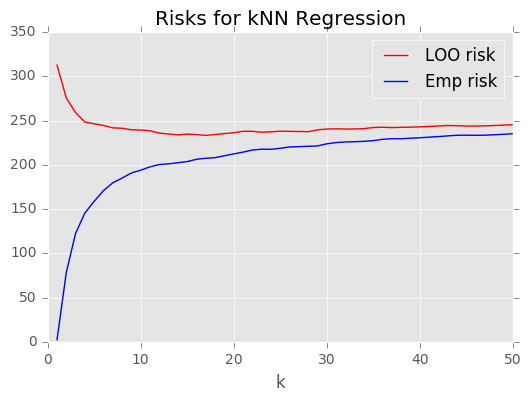

In [13]:
LOOs = []
MSEs = []
K=50
Ks = range(1,K+1)
for k in Ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(X,y,knn))
    MSEs.append(emp_risk(X,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("Risks for kNN Regression")
plt.plot(Ks,MSEs,'b',label="Emp risk")
plt.legend()
_ = plt.xlabel('k')

In [16]:
LOOs[13]

233.81674477000831

We can see that the LOO risk stops improving after about k=13, but it doesn't appear that bias starts to really dominate until about k = 18, where we begin to see the LOO risk going back up. With low k, the variance is high, so we see the LOO risk is high (since leaving one out will drastically affect the outcome with small k). As we increase k, we see the LOO risk improve, until the bias starts to dominate. The LOO risk at k=13 is about 233.18, which is better than the LOO for linear regression that we saw above. 

__Exercise 2.3__ (10 pts) Implement forward stepwise regression (ESL section 3.3.2) for the linear model and compare the LOO risk for each stage.  Recall that at each step forward stepwise regression will select a new variable that most improves the empirical risk and include that in the model (starting with the intercept).

In [7]:
n,p = X.shape
Xsc = scale(X)
ysc = scale(y)

In [8]:
def subsetR(subset, Xsc, ysc, n):
    """Fits model and computes empirical risk for a given subset of features
    input: a list of feature indices, scaled X and y matrices, number of rows of Xsc
    output: the empirical for the linear regression model fitted to those features"""
    lin1 = linear_model.LinearRegression(fit_intercept=False)
    model = lin1.fit(Xsc[:,subset], ysc)
    R = (((model.predict(Xsc[:,subset]) - ysc) ** 2).sum())/n
    LOO = loo_risk(Xsc[:,subset],ysc,lin1)
    return {'model': subset, 'R':R, 'LOO': LOO}

def forward(pred, Xsc, ysc, n):
    """Peforms one step of the forward stepwise regression algorithm and returns an updated list of indices
    of predictors
    input: list of indices of predictor variables that have been accepted, scaled X and y matrices, number of rows
    output: updated list of indices of predictor variables that have been accepted"""
    rem_pred = [p for p in pd.DataFrame(Xsc).columns if p not in pred]
    results = []
    for p in rem_pred:
        results.append(subsetR(pred+[p], Xsc, ysc, n))
    models = pd.DataFrame(results)
    best_model = models.loc[models['R'].argmin()]
    return best_model

In [10]:
pred = []
final_models = pd.DataFrame(columns=['LOO', 'R', 'model'])

for i in range(p):
    final_models.loc[i] = forward(pred, Xsc, ysc, n)
    pred = final_models.loc[i]['model']

In [11]:
final_models

,LOO,R,model
0,0.853223,0.852019,[3]
1,0.809525,0.807354,"[3, 1]"
2,0.802668,0.799527,"[3, 1, 2]"
3,0.803733,0.799518,"[3, 1, 2, 0]"


We can see that the best LOO risk occurs for a model with $X_2, X_3,$ and $X_4$, whereas the forward stepwise regression chose to include all of the $X$ variables when comparing the empirical risk. 